<a href="https://colab.research.google.com/github/pranjaltodkar/DAV/blob/main/music%26mental_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
# loading the csv data to a Pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/mxmh_survey_results.csv')

In [ ]:
# print first 5 rows of the dataset
data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [ ]:
sns.set(color_codes = True)
sns.set_palette(palette = 'magma', n_colors = 8)

In [ ]:
color1 = sns.color_palette("magma",3)
color2 = sns.color_palette("magma")

In [ ]:
# data set size check
data.shape

(736, 33)

DATA CLEANING

In [ ]:
# check uniques values as per dataset
for i in data.columns:
    print(i)
    print(data[i].unique())

Timestamp
['8/27/2022 19:29:02' '8/27/2022 19:57:31' '8/27/2022 21:28:18'
 '8/27/2022 21:40:40' '8/27/2022 21:54:47' '8/27/2022 21:56:50'
 '8/27/2022 22:00:29' '8/27/2022 22:18:59' '8/27/2022 22:33:05'
 '8/27/2022 22:44:03' '8/27/2022 22:51:15' '8/27/2022 23:00:32'
 '8/27/2022 23:04:00' '8/27/2022 23:12:03' '8/27/2022 23:16:06'
 '8/27/2022 23:19:52' '8/27/2022 23:39:41' '8/27/2022 23:39:49'
 '8/27/2022 23:40:55' '8/27/2022 23:41:36' '8/27/2022 23:43:06'
 '8/28/2022 0:28:02' '8/28/2022 1:39:02' '8/28/2022 3:19:08'
 '8/28/2022 4:13:11' '8/28/2022 4:38:14' '8/28/2022 4:40:36'
 '8/28/2022 5:05:51' '8/28/2022 5:16:30' '8/28/2022 8:36:27'
 '8/28/2022 10:30:22' '8/28/2022 10:38:05' '8/28/2022 10:54:30'
 '8/28/2022 10:59:53' '8/28/2022 11:08:51' '8/28/2022 11:13:25'
 '8/28/2022 11:25:49' '8/28/2022 11:27:15' '8/28/2022 11:36:35'
 '8/28/2022 11:39:21' '8/28/2022 11:50:31' '8/28/2022 11:54:45'
 '8/28/2022 11:55:54' '8/28/2022 11:58:48' '8/28/2022 12:08:29'
 '8/28/2022 12:12:35' '8/28/2022 12:15:

In [ ]:
# check null values
data.isna().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

Missing values:
To handle missing values: delete if insignificant, impute with mean/median/mode, regression, or KNN; use forward/backward-fill for time-series, interpolate, apply domain knowledge, or create indicator variable. Choose based on data and analysis go



In [ ]:
data["Age"] = data["Age"].fillna(data["Age"].median())
data["Primary streaming service"] = data["Primary streaming service"].fillna(data["Primary streaming service"].mode()[0])
data["While working"] = data["While working"].fillna(data["While working"].mode()[0])
data["Instrumentalist"] = data["Instrumentalist"].fillna(data["Instrumentalist"].mode()[0])
data["Composer"] = data["Composer"].fillna(data["Composer"].mode()[0])
data["Foreign languages"] = data["Foreign languages"].fillna(data["Foreign languages"].mode()[0])
#data["BPM"] = data["BPM"].fillna(data["BPM"].median())
data["Music effects"] = data["Music effects"].fillna(data["Music effects"].mode()[0])

In [ ]:
data.isna().sum()

Timestamp                         0
Age                               0
Primary streaming service         0
Hours per day                     0
While working                     0
Instrumentalist                   0
Composer                          0
Fav genre                         0
Exploratory                       0
Foreign languages                 0
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [ ]:
# change datatypes paricaler column
data["Age"] = data["Age"].astype(int)

In [ ]:
data.head(2)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,Improve,I understand.
1,8/27/2022 19:57:31,63,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,Improve,I understand.


Describe:
Handling missing values: addressing empty data slots by deleting, imputing with estimations, or using domain knowledge for accuracy.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,736.0,2.520109e+01,1.204776e+01,10.0,18.0,21.0,28.0,89.0
Hours per day,736.0,3.572758e+00,3.028199e+00,0.0,2.0,3.0,5.0,24.0
BPM,629.0,1.589948e+06,3.987261e+07,0.0,100.0,120.0,144.0,999999999.0
Anxiety,736.0,5.837636e+00,2.793054e+00,0.0,4.0,6.0,8.0,10.0
Depression,736.0,4.796196e+00,3.028870e+00,0.0,2.0,5.0,7.0,10.0
Insomnia,736.0,3.738451e+00,3.088689e+00,0.0,1.0,3.0,6.0,10.0
OCD,736.0,2.637228e+00,2.842017e+00,0.0,0.0,2.0,5.0,10.0


In [ ]:
data.describe(include="object").T

,count,unique,top,freq
Timestamp,736,735,8/28/2022 16:15:08,2
Primary streaming service,736,6,Spotify,459
While working,736,2,Yes,582
Instrumentalist,736,2,No,501
Composer,736,2,No,610
Fav genre,736,16,Rock,188
Exploratory,736,2,Yes,525
Foreign languages,736,2,Yes,408
Frequency [Classical],736,4,Rarely,259
Frequency [Country],736,4,Never,343


In [ ]:
#Remove outliers
age_index = data[(data['Age'] > 70)].index
data = data.drop(age_index, axis=0)
data.shape

(730, 33)

In [ ]:
bpm_index = data[data['BPM'] > 200].index
data = data.drop(bpm_index, axis=0)

hpd_index = data[data['Hours per day'] >= 15].index
data = data.drop(hpd_index, axis=0)

miss_bpm_genre = ['Country', 'Hip hop', 'Pop', 'Rock', 'Metal', 'Classical',
       'Video game music', 'R&B', 'Folk', 'Jazz', 'EDM', 'Gospel',
       'K pop', 'Rap']

for i in miss_bpm_genre:
  data['BPM'] = data['BPM'].fillna(round(data[data['Fav genre']== i ]['BPM'].mode(), 0))
data['BPM']

0      156.0
1      119.0
2      132.0
3       84.0
4      107.0
       ...  
731    120.0
732    160.0
733    120.0
734    170.0
735     98.0
Name: BPM, Length: 714, dtype: float64

In [ ]:
data.head(2)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,Improve,I understand.
1,8/27/2022 19:57:31,63,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,Improve,I understand.


Dimensionality reduction method

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Explained Variance Ratio:
[0.29502752 0.15507733 0.14797795 0.13080669 0.11564835 0.0966383
 0.05882387]


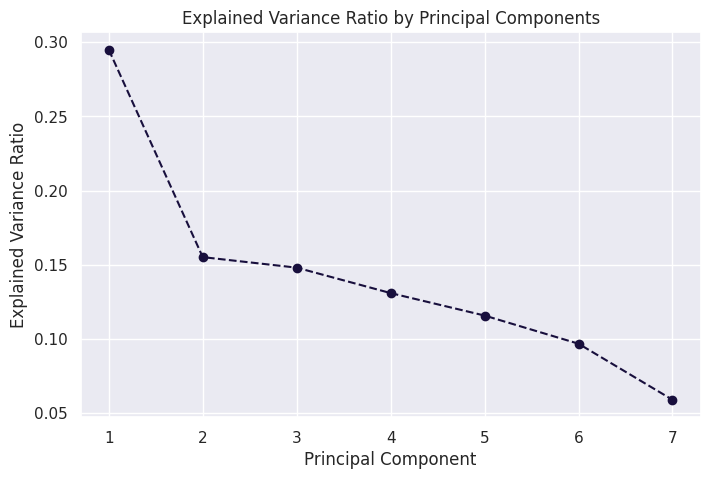


Number of components to retain 95% of variance: 7

Principal Components:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7
0 -2.083560 -1.114645 -0.943102 -0.485797  0.087624 -0.392046 -0.377512
1 -1.570625  2.822668 -0.197540  0.128856  1.167365  1.590191 -1.120344
2  1.513810  0.379584 -0.535496  0.078968 -0.568389 -1.436490 -0.208953
3  0.174047  3.096261  0.790937  0.541927  0.600801  2.040031 -0.431953
4  0.853773 -1.046707  1.121911  0.363277  1.818817 -0.430744 -0.311771


In [ ]:
# Drop non-numeric columns and NaN values
numeric_data = data.select_dtypes(include=['int64', 'float64']).dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance_ratio)

# Plot explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

# Choose number of components
# Let's say we want to retain 95% of the variance
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print("\nNumber of components to retain 95% of variance:", n_components)

# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

# Convert to DataFrame
principal_data = pd.DataFrame(data=principal_components, columns=[f"PC{i}" for i in range(1, n_components + 1)])

# Concatenate with non-numeric columns if needed
# final_data = pd.concat([principal_data, data.select_dtypes(exclude=['int64', 'float64'])], axis=1)

# Display the principal components
print("\nPrincipal Components:")
print(principal_data.head())

Select and apply statistical analysis using suitable Python libraries. (Statistical parameters, correlation, covariance, regression, etc.) for above dataset

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Statistical Summary:
              Age  Hours per day         BPM     Anxiety  Depression  \
count  714.000000     714.000000  609.000000  714.000000  714.000000   
mean    24.808123       3.405182  121.972085    5.871849    4.817927   
std     11.100883       2.518266   32.452408    2.783321    3.015116   
min     10.000000       0.000000    0.000000    0.000000    0.000000   
25%     18.000000       2.000000  100.000000    4.000000    2.000000   
50%     21.000000       3.000000  120.000000    6.000000    5.000000   
75%     27.000000       4.000000  141.000000    8.000000    7.000000   
max     70.000000      14.000000  200.000000   10.000000   10.000000   

         Insomnia         OCD  
count  714.000000  714.000000  
mean     3.733193    2.638655  
std      3.067136    2.838642  
min      0.000000    0.000000  
25%      1.000000    0.000000  
50%      3.000000    2.000000  
75%      6.000000    5.000000  
max     10.000000   10.000000  

Correlation Matrix:
                    A

<ipython-input-22-35c3a2ffa5fb>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()
<ipython-input-22-35c3a2ffa5fb>:12: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = data.cov()


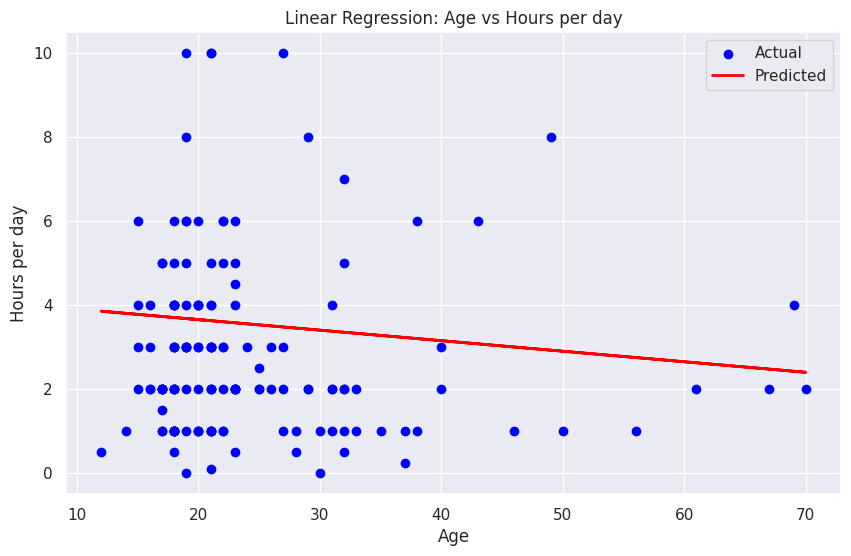

In [ ]:
# Statistical Parameters
statistical_summary = data.describe()
print("Statistical Summary:")
print(statistical_summary)

# Correlation
correlation_matrix = data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Covariance
covariance_matrix = data.cov()
print("\nCovariance Matrix:")
print(covariance_matrix)

# Linear Regression
# For example, let's predict the number of hours per day spent listening to music based on age.
X = data[['Age']]
y = data['Hours per day']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error:", mse)

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression: Age vs Hours per day')
plt.xlabel('Age')
plt.ylabel('Hours per day')
plt.legend()
plt.show()

Data Visualization

<ipython-input-23-d7f171f330ba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x="Primary streaming service",palette=color2)


<Axes: xlabel='Primary streaming service', ylabel='count'>

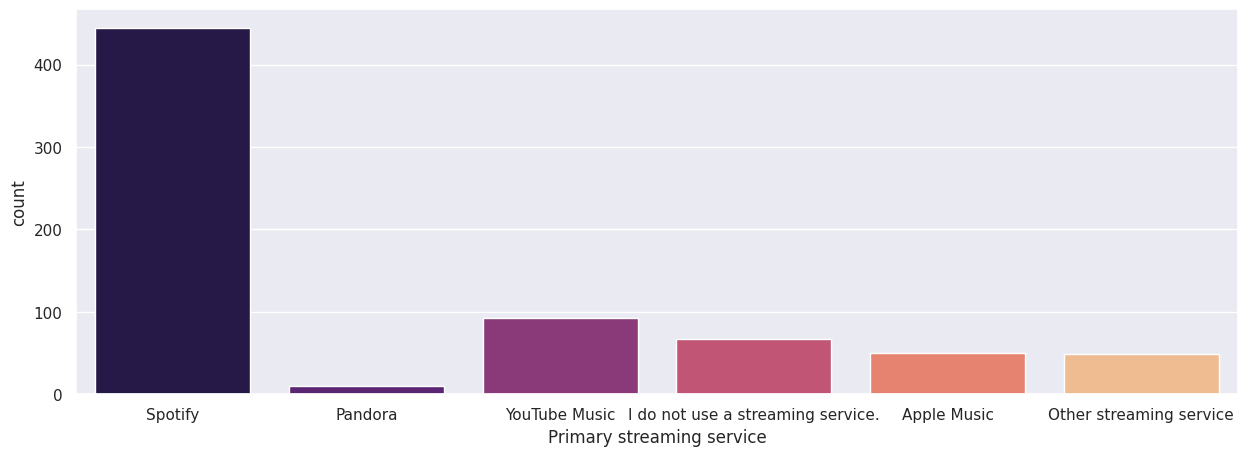

In [ ]:
#count plot
plt.figure(figsize=(15,5))
sns.countplot(data=data,x="Primary streaming service",palette=color2)

Observation:
Most people tend to use streaming services like Spotify and YouTube.

<Axes: xlabel='Age', ylabel='Count'>

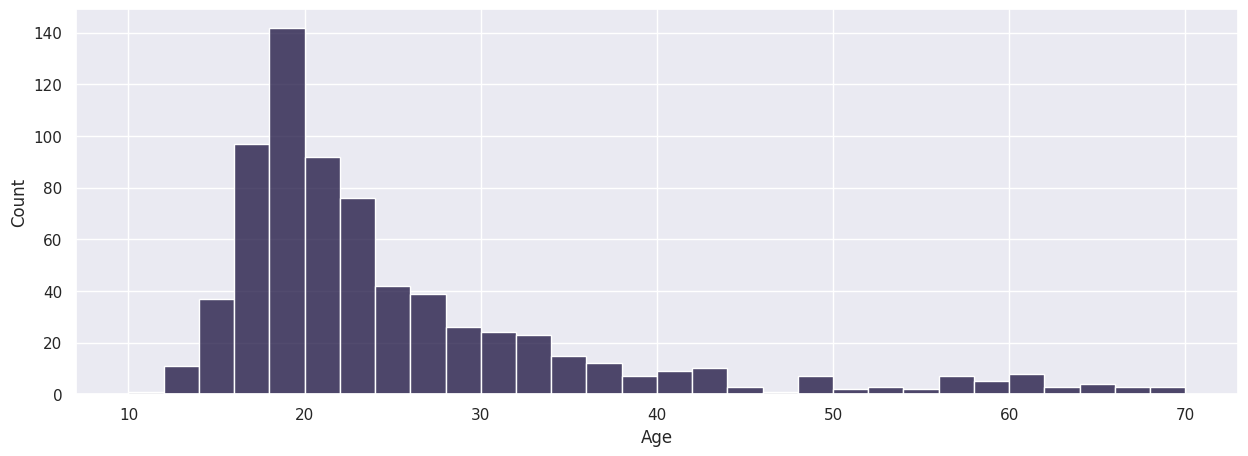

In [ ]:
#hist plot
plt.figure(figsize=(15,5))
sns.histplot(data=data,x="Age")

Observation:
Exclusively, the age group that predominantly engages with streaming music and songs ranges from 18 to 27 years old.

<Axes: xlabel='Hours per day', ylabel='Count'>

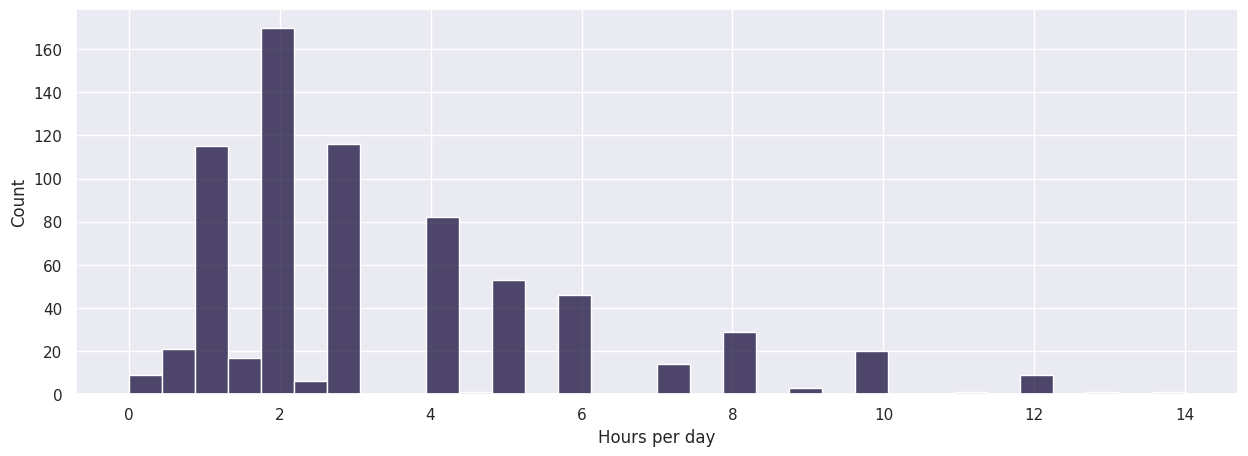

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(data=data,x="Hours per day")

obsevation:
Most people listen to music for 1 to 4 hours per day.

<ipython-input-26-002e9851021a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x="While working",palette=color1)
<ipython-input-26-002e9851021a>:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=data,x="While working",palette=color1)


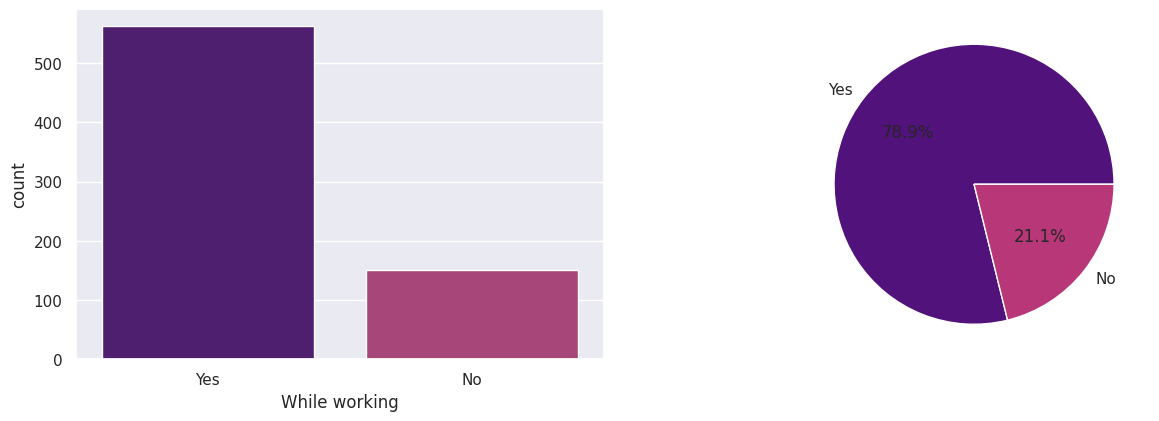

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(data=data,x="While working",palette=color1)
plt.subplot(2,2,2)
plt.pie(data["While working"].value_counts(),colors=color1,labels=["Yes","No"],autopct="%0.1f%%")
plt.show()

Observation:
Mostly working professionals. Most people listen to music, about 79%.

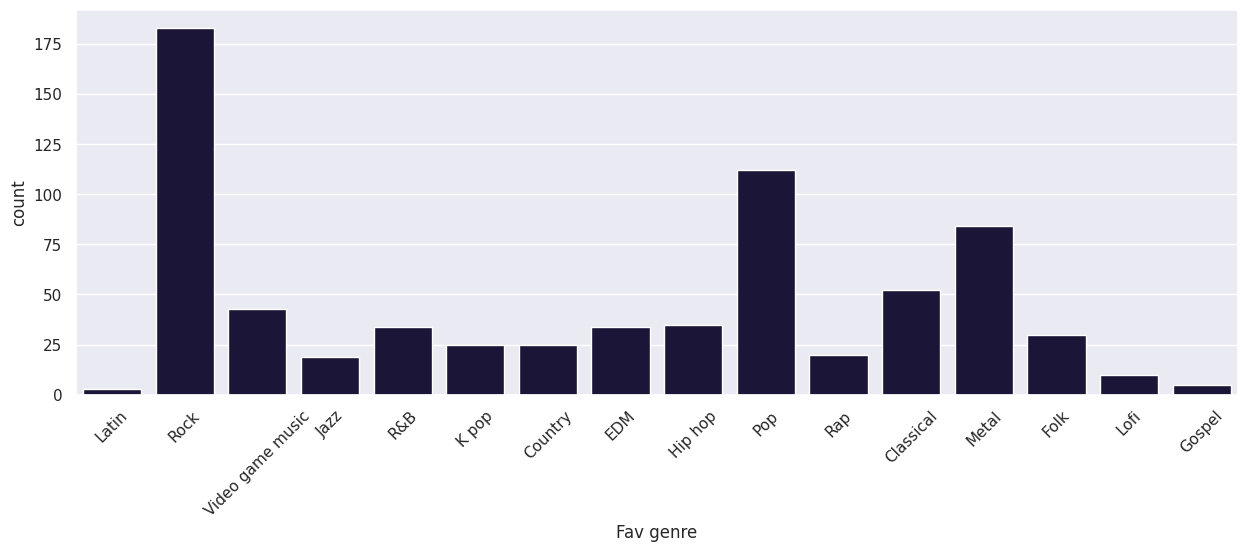

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=data,x="Fav genre")
plt.xticks(rotation=45)
plt.show()

Observation:
Most people listen to rock, pop, and metal music.

<Axes: xlabel='BPM', ylabel='Count'>

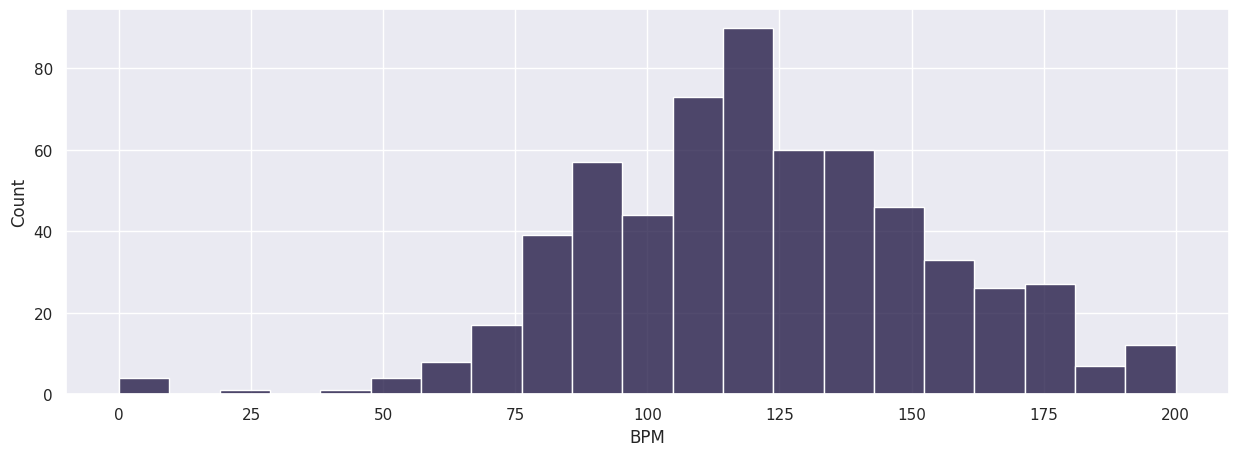

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(data["BPM"])

Observation:
Most people listen to songs with a beat in the range of 80 to 150.

In [ ]:
data.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

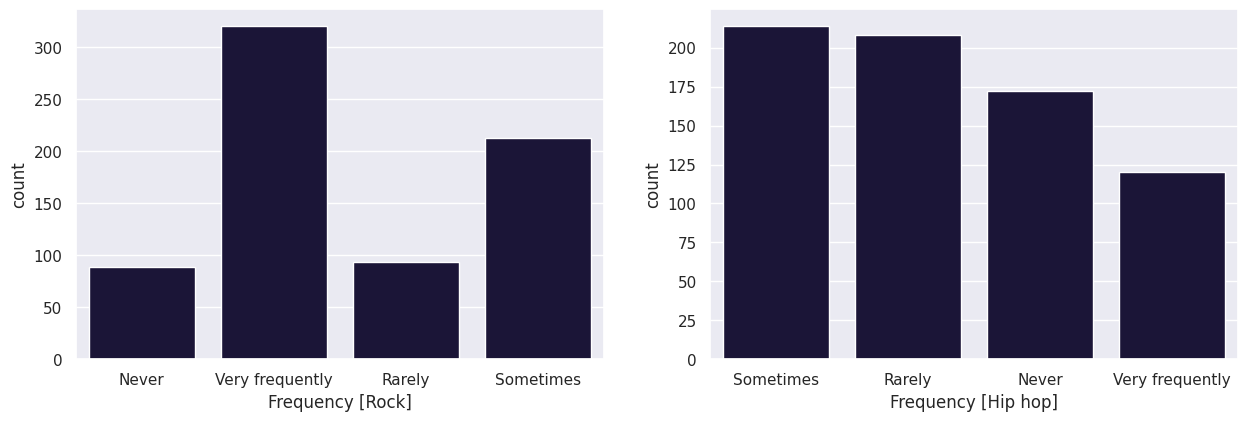

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(data=data,x="Frequency [Rock]")
plt.subplot(2,2,2)
sns.countplot(data=data,x="Frequency [Hip hop]")
plt.show()

observation:
Most people listen to Rock songs with very frequently and sometime.
Most people listen to Hip Hop songs sometime or rerely.

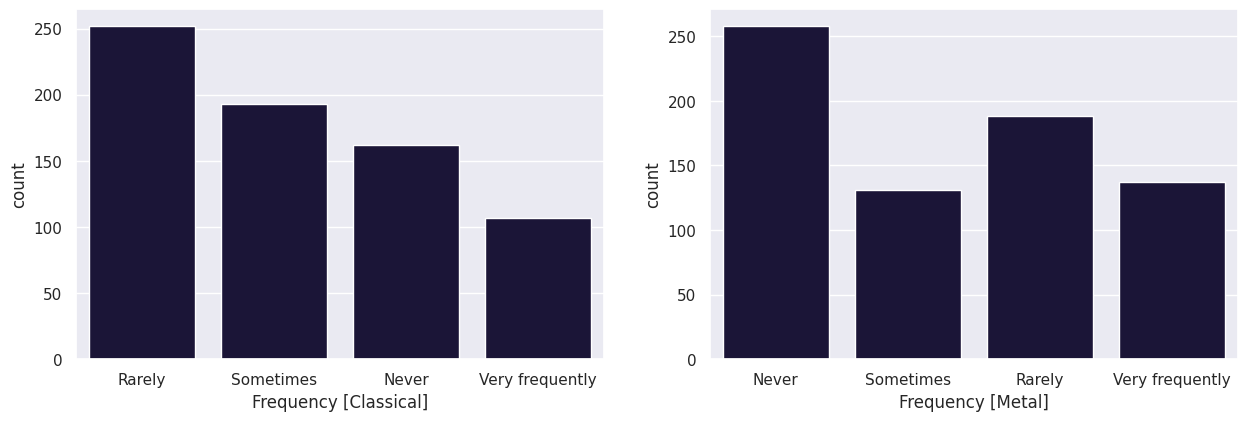

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(data=data,x="Frequency [Classical]")
plt.subplot(2,2,2)
sns.countplot(data=data,x="Frequency [Metal]")
plt.show()

observation:
Most people listen to classical songs rerely and sometime.
Most people listen to Matel songs never or rerely.

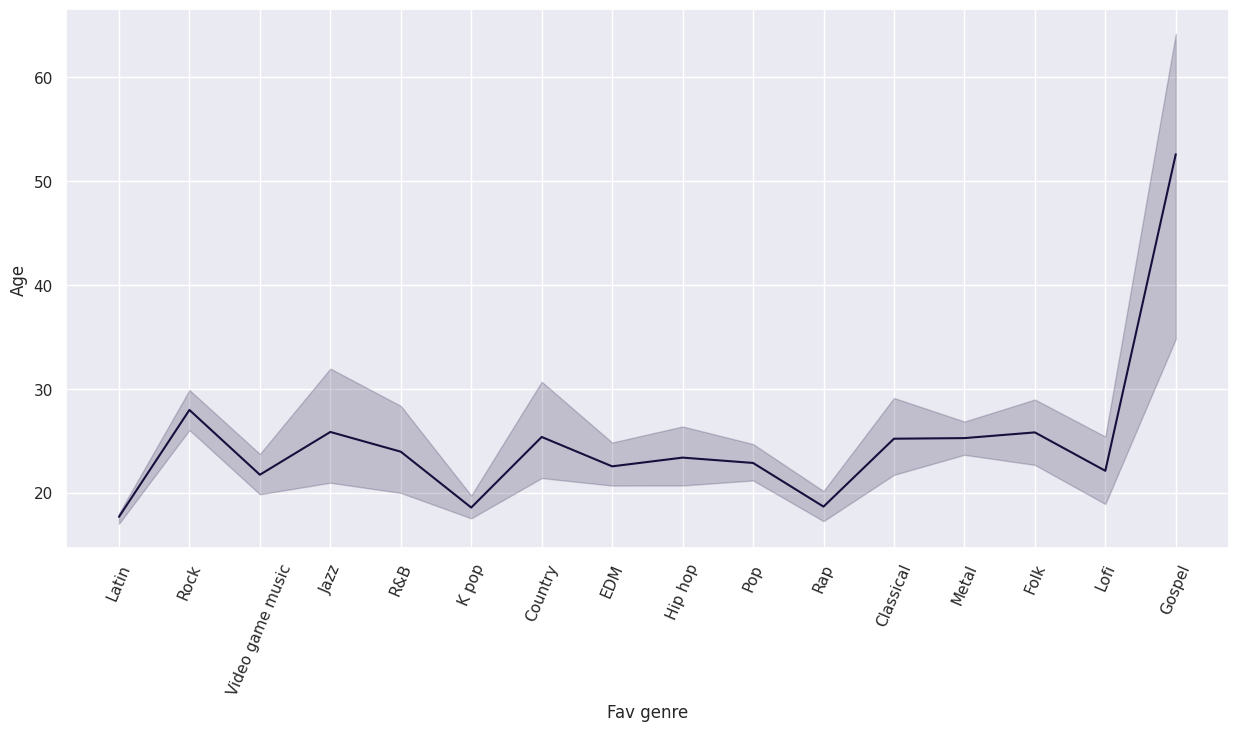

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data=data,x="Fav genre",y="Age")
plt.xticks(rotation=67)
plt.show()

Observation:
The average age of individuals within the age range of 20 to 30 in the specified area who listen to all types of songs is around 25 years old. The maximum age group that predominantly enjoys listening to Lofi songs falls between 30 to 50 years old..

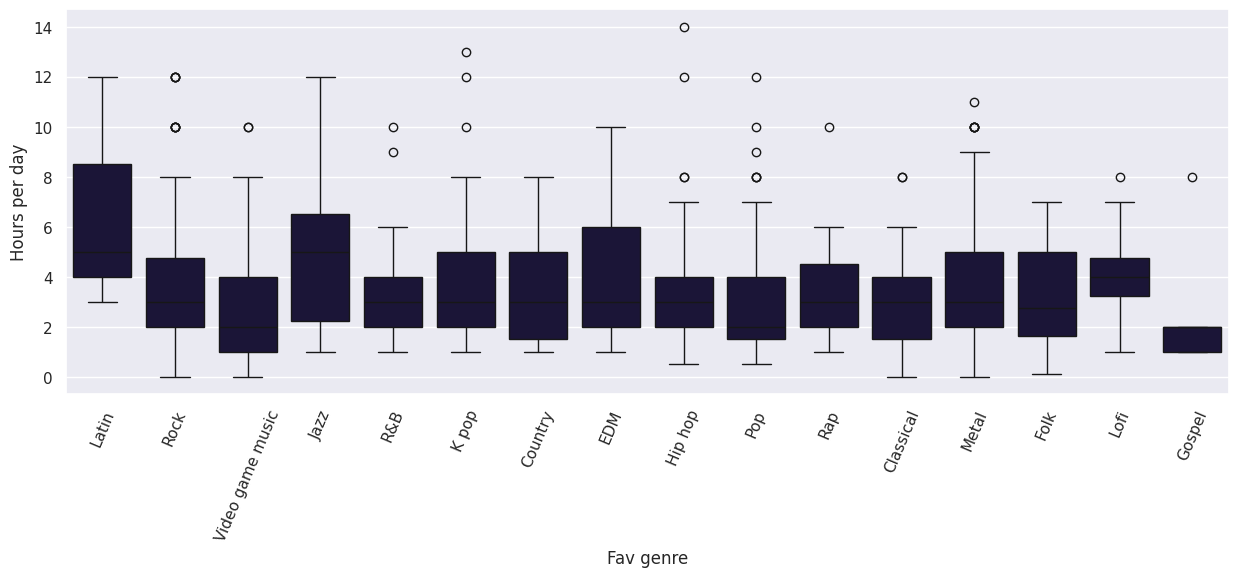

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data,x="Fav genre",y="Hours per day")
plt.xticks(rotation=67)
plt.show()

Observation:
Most people in the area listen to Latin and Jazz songs for an average of one hour per day.

<ipython-input-34-708956083603>:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(data=data,x="Fav genre",y="Depression",errwidth=0)


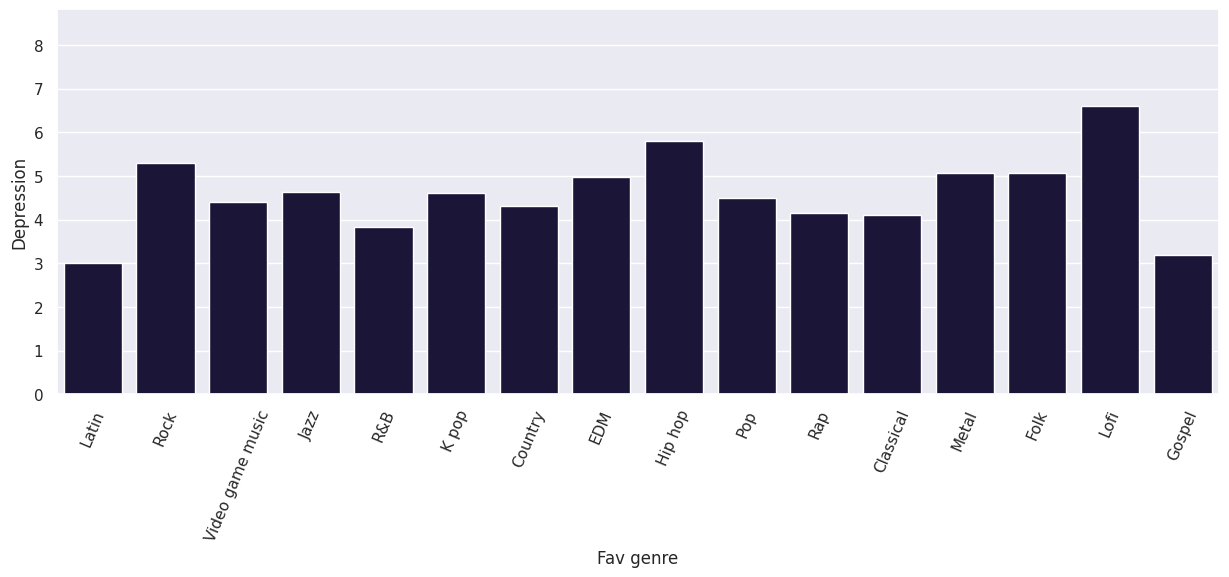

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x="Fav genre",y="Depression",errwidth=0)
plt.xticks(rotation=67)
plt.show()

Observation:
Listening to Lofi, rock, and hip-hop doesnt directly indicate depression. Mental health is complex; music is one of many factors. Seek professional help if needed.

<ipython-input-35-7ba7e8cd2480>:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(data=data,x="Fav genre",y="Anxiety",errwidth=0)


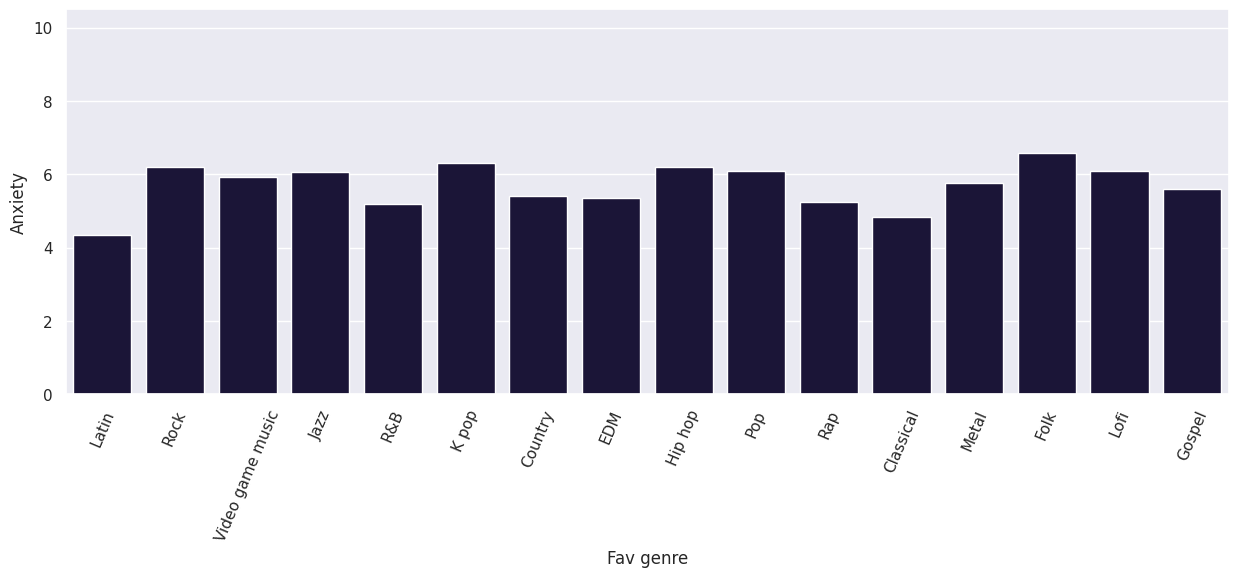

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x="Fav genre",y="Anxiety",errwidth=0)
plt.xticks(rotation=67)
plt.show()

Observation:
Many individuals experiencing anxiety are drawn to genres like rock, K-pop, and folk. However, musical preferences are diverse and not solely indicative of mental health issues. Professional support is crucial for managing anxiety

<ipython-input-36-71ce97f7a8fe>:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(data=data,x="Fav genre",y="Insomnia",errwidth=0)


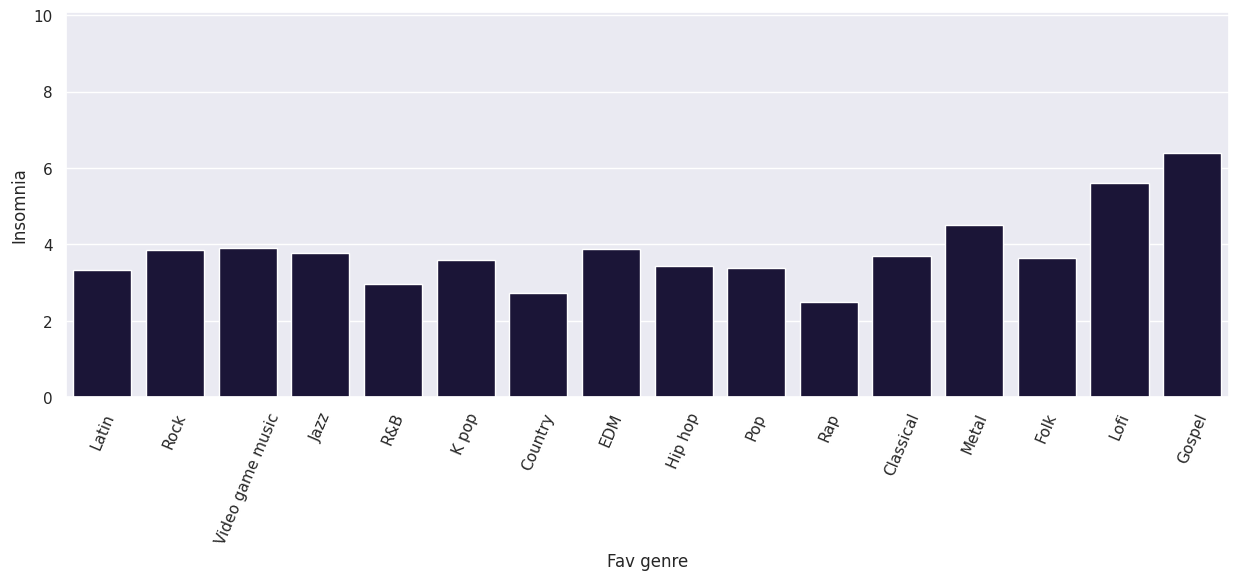

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x="Fav genre",y="Insomnia",errwidth=0)
plt.xticks(rotation=67)
plt.show()

Observation:¶
While many people who listen to Gospel and Lofi songs might experience insomnia, it's crucial to understand that musical choices alone don't directly cause insomnia. Insomnia has multiple causes and requires proper evaluation and treatment.

<ipython-input-37-c178c4d1846a>:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(data=data,x="Fav genre",y="Age",hue="Music effects",errwidth=0,palette="mako_r")


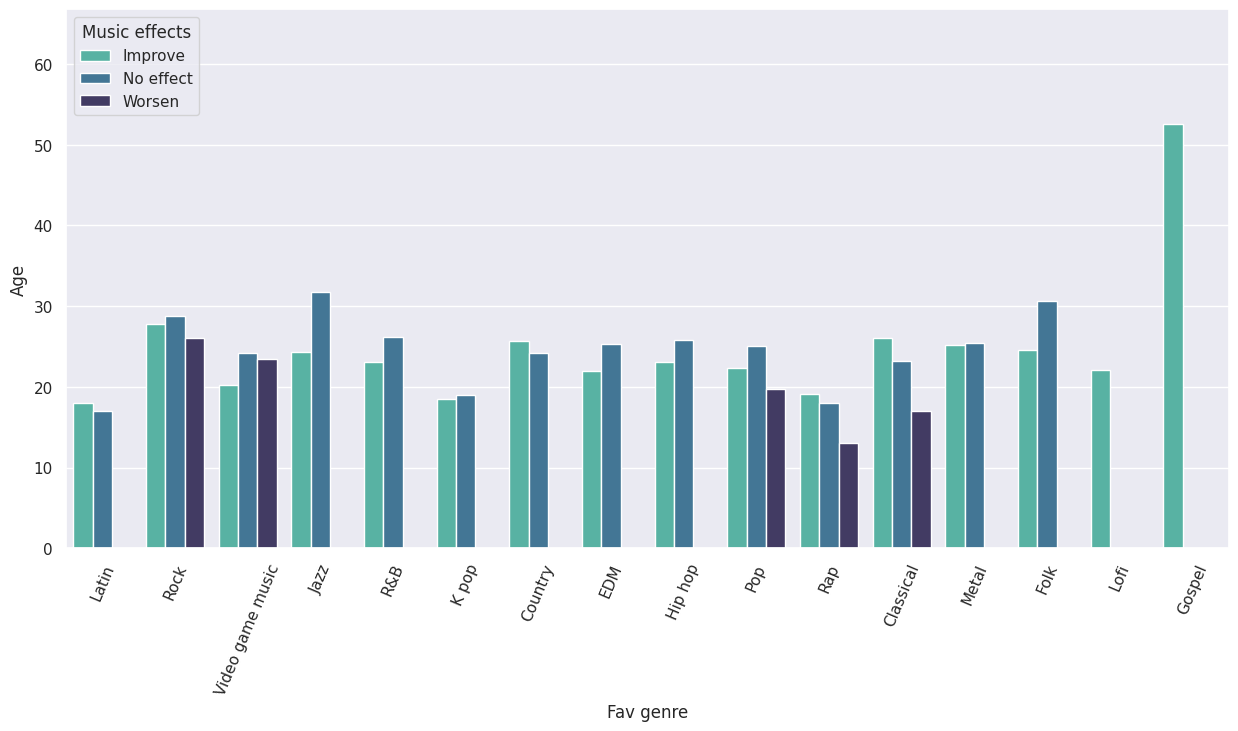

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(data=data,x="Fav genre",y="Age",hue="Music effects",errwidth=0,palette="mako_r")
plt.xticks(rotation=67)
plt.show()

Observation:
Listeners of all ages generally experience some improvement from music, but genres like Rock, Video Game Music, Pop, Rap, and Classical seem to worsen conditions for some individuals

<ipython-input-38-de42c7a815df>:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(data=data,x="Fav genre",y="Hours per day",hue="Music effects",errwidth=0,palette="mako_r")


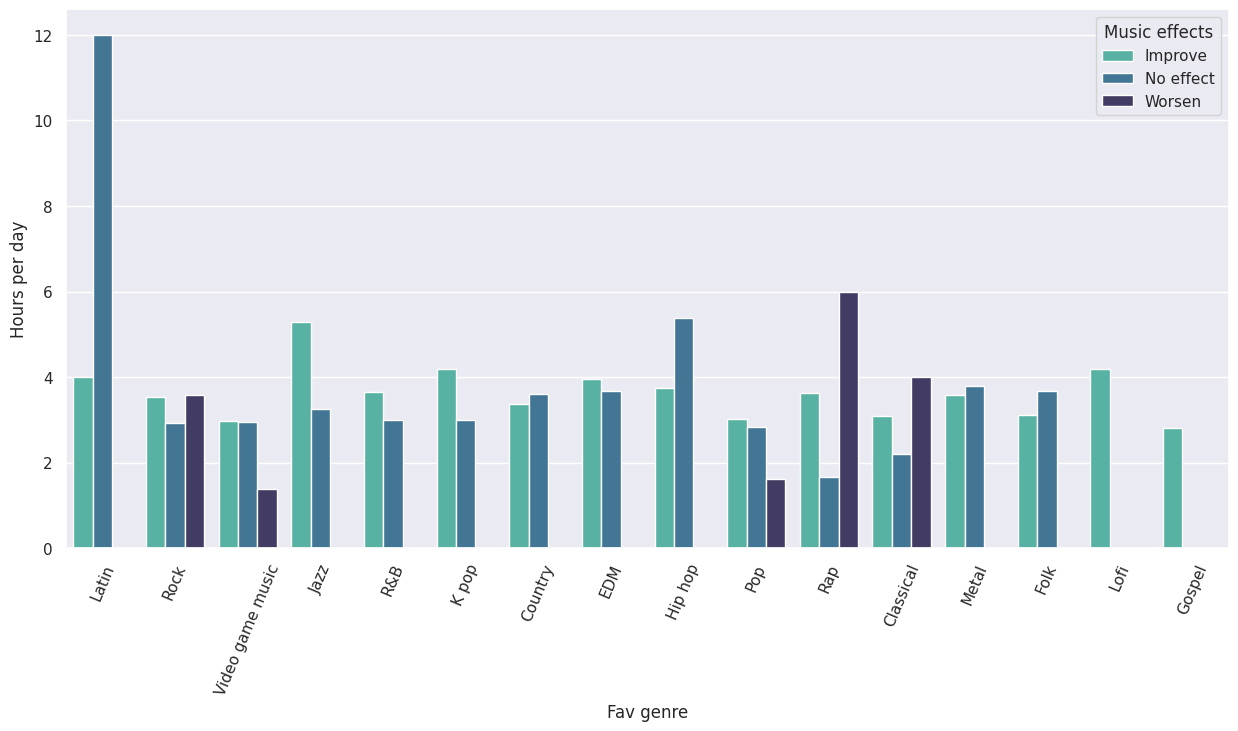

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(data=data,x="Fav genre",y="Hours per day",hue="Music effects",errwidth=0,palette="mako_r")
plt.xticks(rotation=67)
plt.show()

Observation:¶
Listeners of Jazz, Lofi, and K-pop songs tend to experience improvements in their mood and overall well-being as they engage with music for several hours per day.

<ipython-input-39-a62970da2017>:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(data=data,x="Fav genre",y="Depression",hue="Music effects",errwidth=0,palette="mako_r")


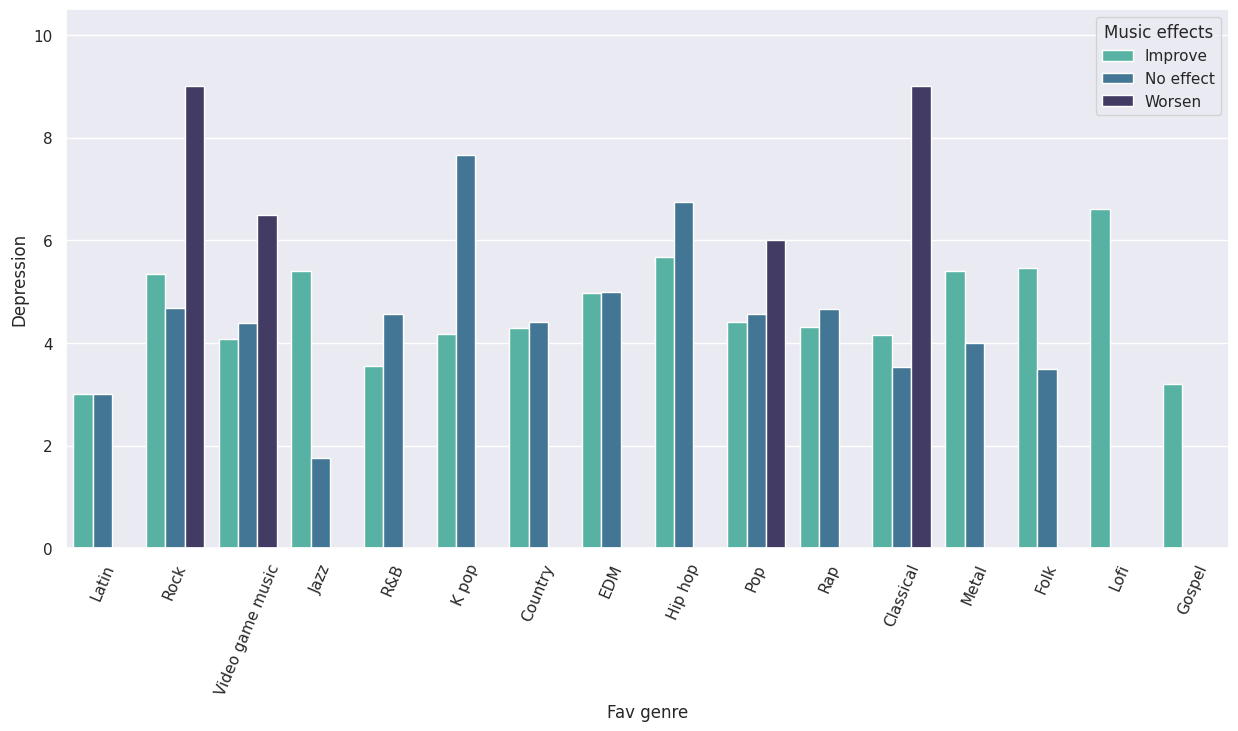

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(data=data,x="Fav genre",y="Depression",hue="Music effects",errwidth=0,palette="mako_r")
plt.xticks(rotation=67)
plt.show()

Observation:
Listeners of Rock, Video Game Music, Pop, and Classical genres tend to exhibit a higher level of depression.

<ipython-input-40-50ca9750647f>:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(data=data,x="Fav genre",y="Anxiety",hue="Music effects",errwidth=0,palette="mako_r")


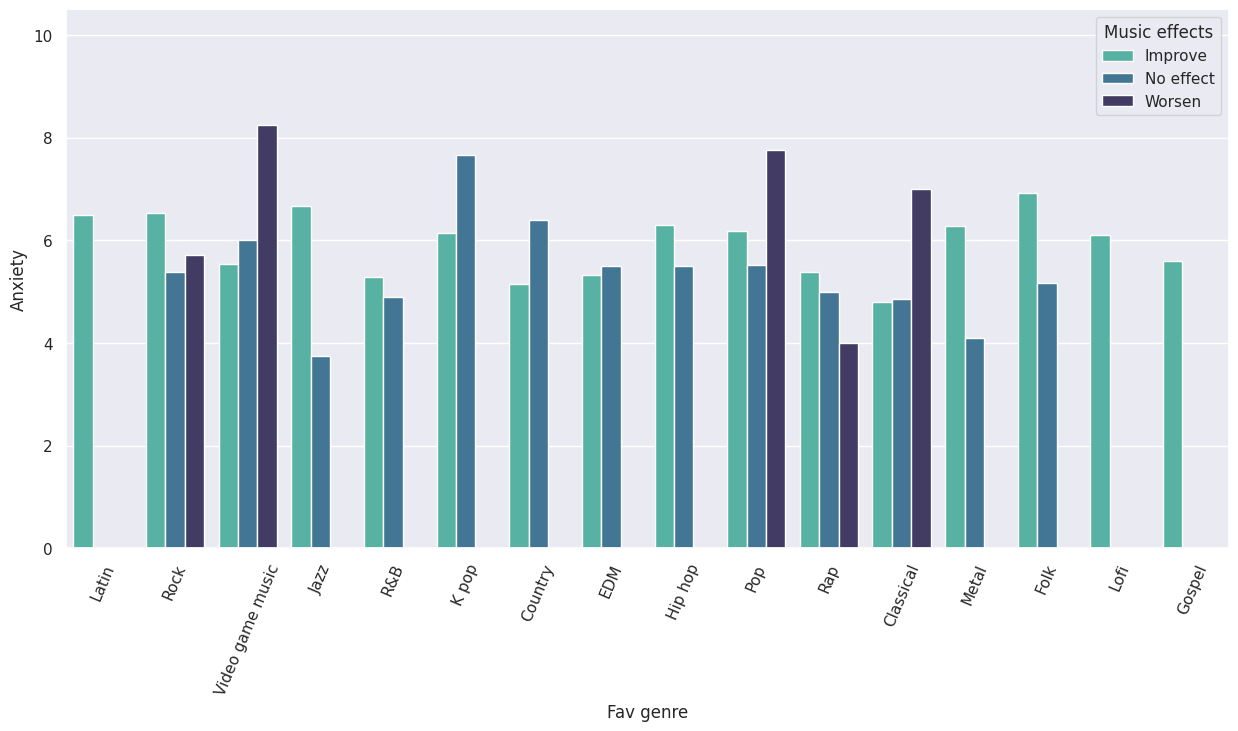

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(data=data,x="Fav genre",y="Anxiety",hue="Music effects",errwidth=0,palette="mako_r")
plt.xticks(rotation=67)
plt.show()

Observation:
Listeners of Rock, Video Game Music, Pop, Rap, and Classical exhibit varying levels of anxiety. Among these, Video Game Music listeners tend to experience the highest level of anxiety.

<ipython-input-41-10e2f97a59e9>:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(data=data,x="Fav genre",y="Insomnia",hue="Music effects",errwidth=0,palette="mako_r")


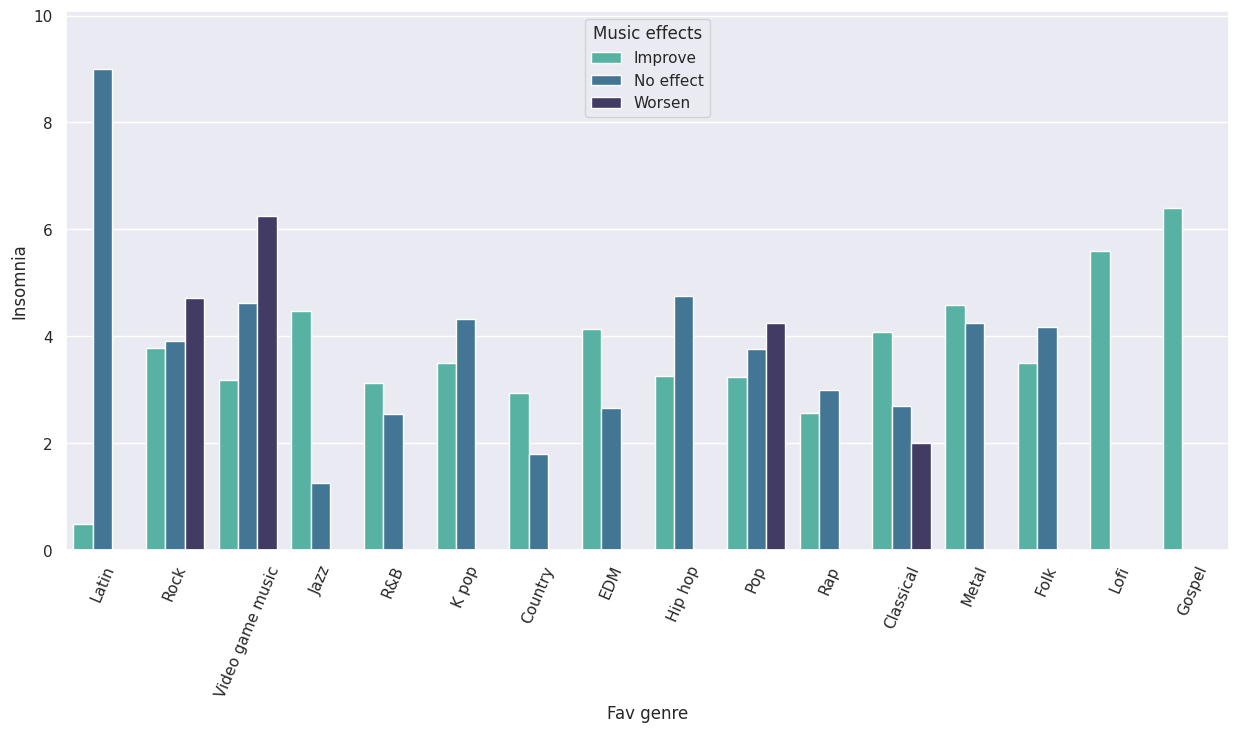

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(data=data,x="Fav genre",y="Insomnia",hue="Music effects",errwidth=0,palette="mako_r")
plt.xticks(rotation=67)
plt.show()

Observation:
Listeners of Rock, Video Game Music, Pop, and Classical genres show a propensity for experiencing insomnia. Among these, Video Game Music listeners tend to have the highest level of insomnia.

Hypothesis analysis for the dataset

In [ ]:
from scipy.stats import f_oneway

Result Interpretation:
If the p-value obtained from f_oneway() (stored in anova_result) is less than the chosen significance level (e.g., 0.05), then we would reject the null hypothesis and conclude that there is a significant difference between the mean 'Hours per day' and 'Age'. This would imply that these two variables have different effects or distributions.

On the other hand, if the p-value is greater than the chosen significance level, we fail to reject the null hypothesis, indicating that there is not enough evidence to conclude that the means of the two variables are different.

In [ ]:
# Perform ANOVA test
# H0: There is no significant difference in the mean number of hours spent listening to music per day across different age groups.
# H1: There is a significant difference in the mean number of hours spent listening to music per day across different age groups.
anova_result = f_oneway(data['Hours per day'], data['Age'])

In [ ]:
print("ANOVA Test Result:")
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

# Interpret the result
alpha = 0.05
if anova_result.pvalue < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean number of hours spent listening to music per day across different age groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean number of hours spent listening to music per day across different age groups.")

ANOVA Test Result:
F-statistic: 2524.2734353231017
p-value: 8.2023e-318
Reject the null hypothesis. There is a significant difference in the mean number of hours spent listening to music per day across different age groups.


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
contingency_table = pd.crosstab(data['Primary streaming service'], data['Fav genre'])

# Perform Chi-Square Test of Independence
# H0: There is no association between the primary streaming service and favorite music genre.
# H1: There is an association between the primary streaming service and favorite music genre.
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print Chi-Square Test result
print("Chi-Square Test Result:")
print("Chi-Square Statistic:", chi2)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is an association between the primary streaming service and favorite music genre.")
else:
    print("Fail to reject the null hypothesis. There is no association between the primary streaming service and favorite music genre.")

Chi-Square Test Result:
Chi-Square Statistic: 154.12188372740658
p-value: 2.0849314970650618e-07
Reject the null hypothesis. There is an association between the primary streaming service and favorite music genre.


Advanced multivariate
data visualization

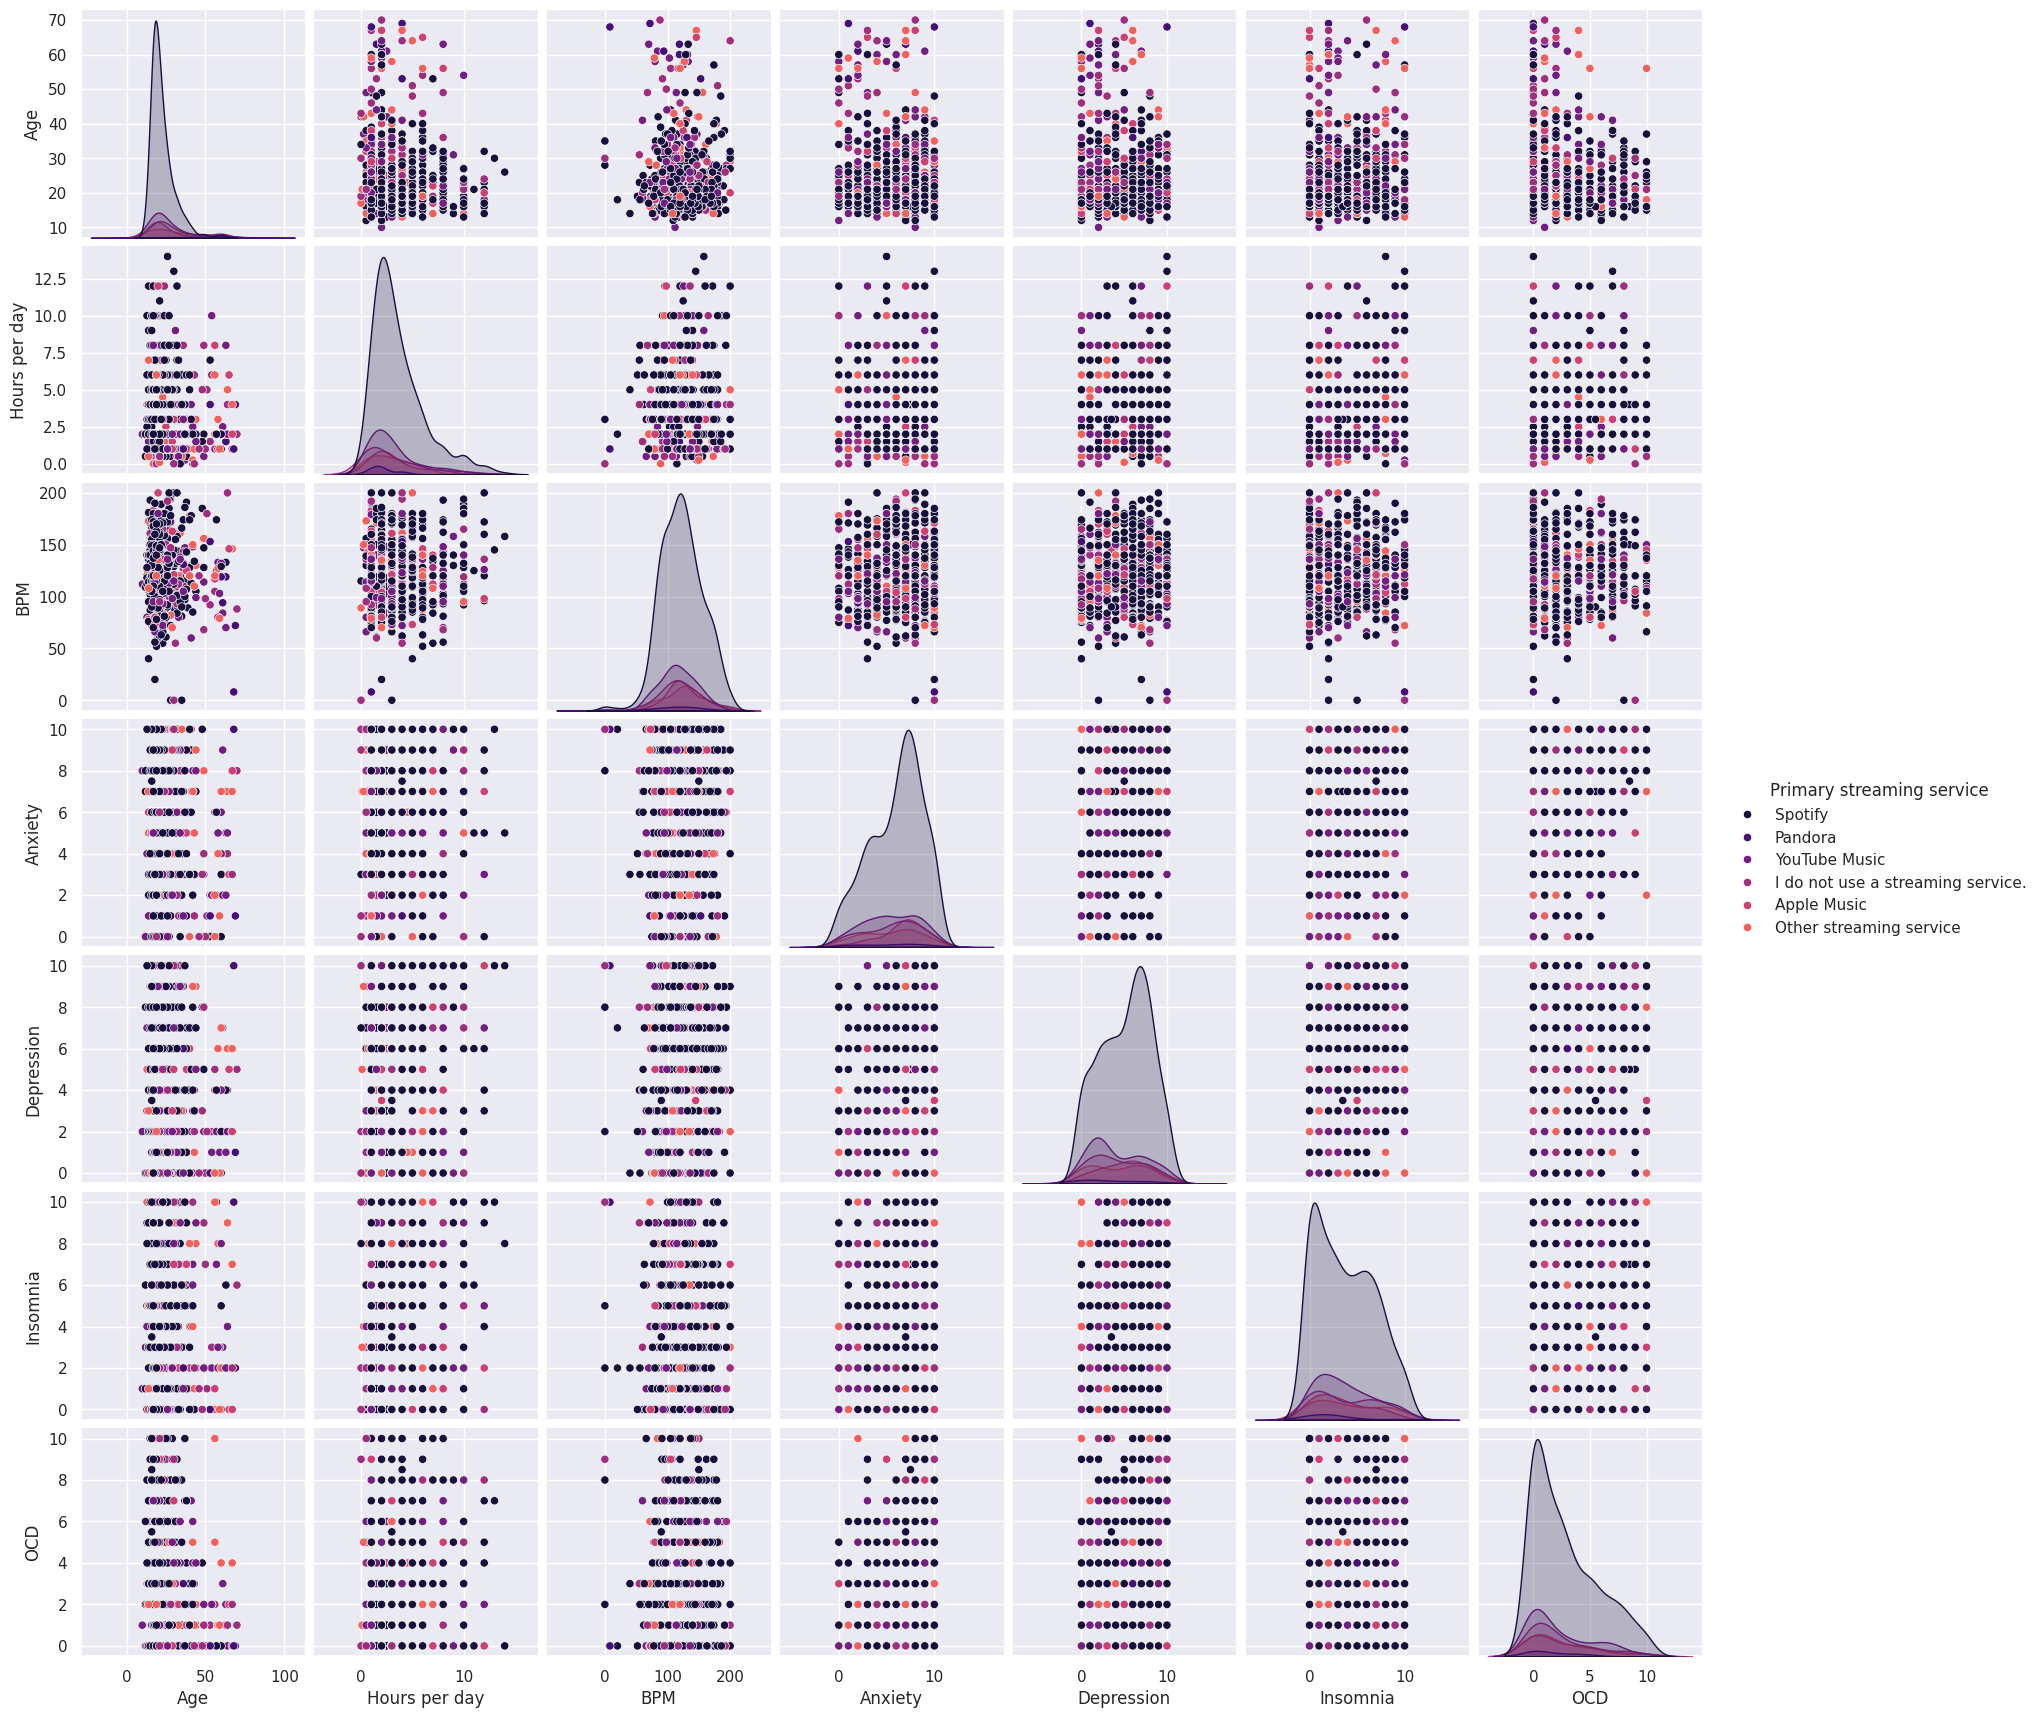

In [ ]:
# Pair Plot
# kernel density estimates will display, providing smoothed representations of the distributions of each numerical variable.
sns.pairplot(data, hue='Primary streaming service', diag_kind='kde')
plt.show()

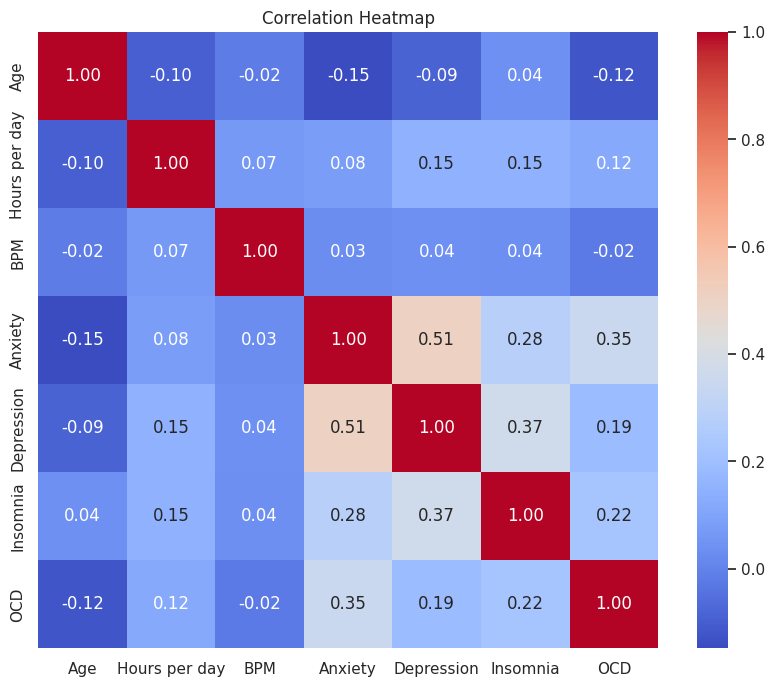

In [ ]:
# Correlation Heatmap
numerical_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

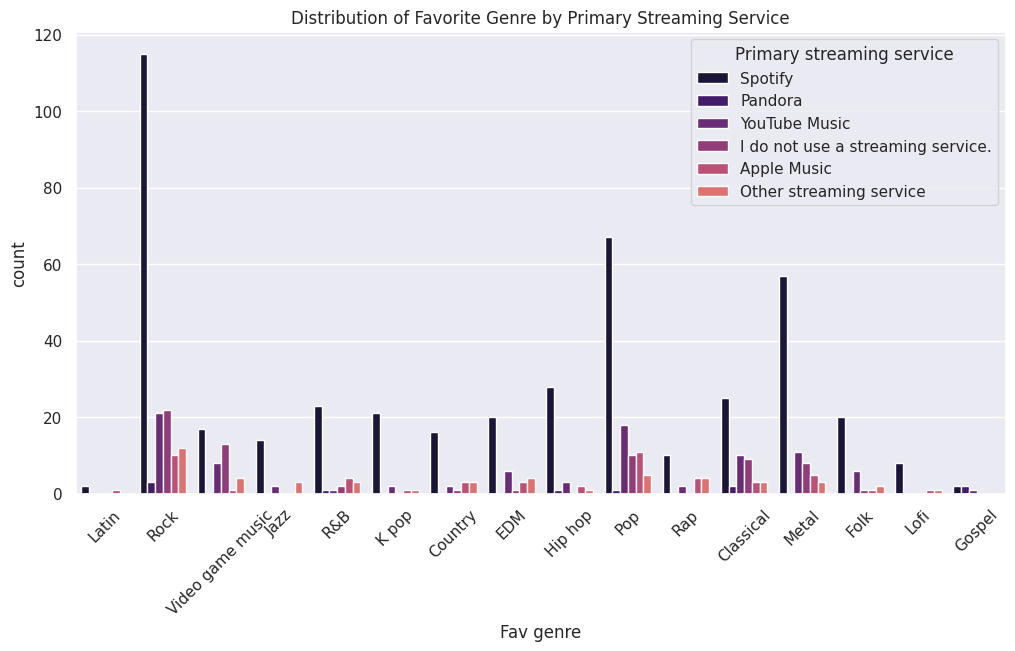

In [ ]:
# Bar Plot
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Fav genre', hue='Primary streaming service')
plt.title("Distribution of Favorite Genre by Primary Streaming Service")
plt.xticks(rotation=45)
plt.show()